# BEFORE THE FIX

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from itertools import chain
import importlib

In [3]:
os.chdir('/Users/lfitzpatrick/changepoint/')
from src import changepoint as cp
cp = importlib.reload(cp)

In [2]:
#os.chdir('/Users/lukefitzpatrick//Desktop/changepoint/')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lukefitzpatrick//Desktop/changepoint/'

In [49]:
from src import changepoint as cp

In [50]:
cp = importlib.reload(cp)

# Example: bike data total miles ridden per day (estimated, since they assume shortest path taken between stations)

In [30]:
os.getcwd()

'/Users/lukefitzpatrick/Desktop/changepoint'

In [32]:
os.listdir()

['.DS_Store', 'README.md', '.git', 'data', 'notebooks', 'src']

In [ ]:
# loading raw data:

# path = os.getcwd()
# bike = pd.DataFrame()
# for file in os.listdir('data/bike/')[1:]:
#     bike = pd.concat([bike, pd.read_csv(path + '/data/bike/'+file)], axis=0)
    
# bike.index = pd.DatetimeIndex(bike['Date'])

# fig, ax = plt.subplots(figsize=(25,5))
# bike['Miles traveled today (midnight to 11:59 pm)'].plot()

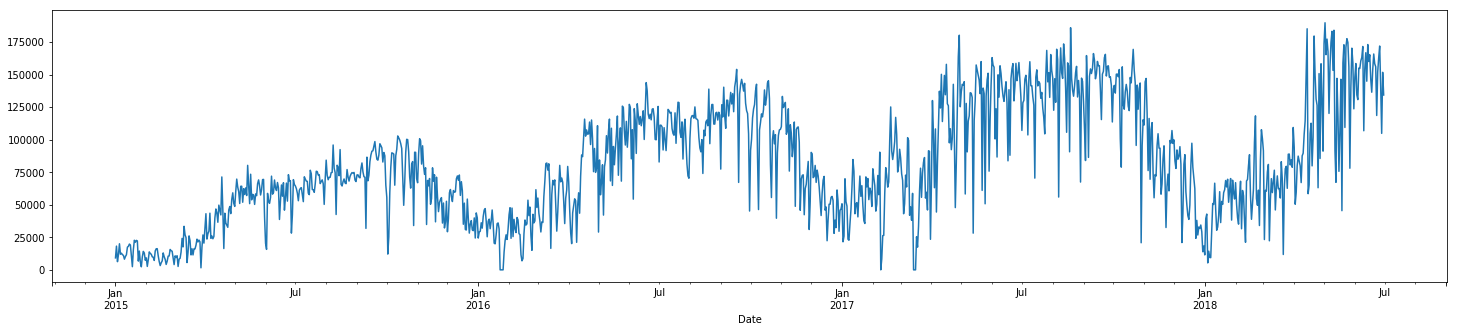

In [35]:
bike = pd.read_csv('data/bikemiles.csv')
    
bike.index = pd.DatetimeIndex(bike['Date'])

fig, ax = plt.subplots(figsize=(25,5))
bike['y'].plot()

In [36]:
bike.head()

,y,Date,y_scaled,t
Date,,,,
2015-01-01,9191,1/1/2015,0.048411,0.000000
2015-01-02,18222,1/2/2015,0.095980,0.000784
2015-01-03,6282,1/3/2015,0.033089,0.001567
2015-01-04,11700,1/4/2015,0.061627,0.002351
2015-01-05,20022,1/5/2015,0.105461,0.003135


In [51]:
cpbike = cp.cp2(bike, ycol='y', delta=10)

%%time
cpts = cpbike.run()

testing 2015-01-01T00:00:00.000000000 to 2018-06-30T00:00:00.000000000
changepoint detected at 2017-08-09T00:00:00.000000000

testing 2015-01-01T00:00:00.000000000 to 2017-08-09T00:00:00.000000000
changepoint detected at 2016-09-05T00:00:00.000000000

testing 2017-08-10T00:00:00.000000000 to 2018-06-30T00:00:00.000000000
no changepoint detected 

testing 2015-01-01T00:00:00.000000000 to 2016-09-05T00:00:00.000000000
changepoint detected at 2016-06-05T00:00:00.000000000

testing 2016-09-06T00:00:00.000000000 to 2017-08-09T00:00:00.000000000
changepoint detected at 2017-05-29T00:00:00.000000000

testing 2015-01-01T00:00:00.000000000 to 2016-06-05T00:00:00.000000000
changepoint detected at 2015-09-23T00:00:00.000000000

testing 2016-06-06T00:00:00.000000000 to 2016-09-05T00:00:00.000000000
no changepoint detected 

testing 2016-09-06T00:00:00.000000000 to 2017-05-29T00:00:00.000000000
no changepoint detected 

testing 2017-05-30T00:00:00.000000000 to 2017-08-09T00:00:00.000000000
no chang

In [52]:
cpbike.data

,y
2015-01-01,9191
2015-01-02,18222
2015-01-03,6282
2015-01-04,11700
2015-01-05,20022
2015-01-06,12003
2015-01-07,12791
2015-01-08,11667
2015-01-09,11093
2015-01-10,8189


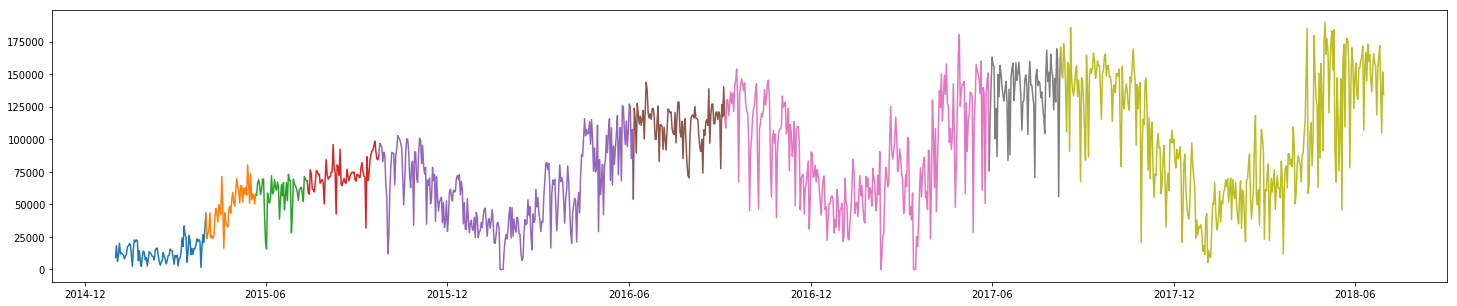

In [53]:
cpbike.make_plot(cpts)

# Example 3: Fed funds rate
spoiler alert: the Fed makes explicitly clear when they change the upper and lower bounds of the target Fed Funds rate.

For those unfamiliar with the Federal Reserve, the federal funds rate (aka fed funds rate) is the weighted average of all overnight bank-to-bank loans. Historically, reserve requirements (legal requirements that depository institutions maintain a proportion of their deposits as reserves) precipitated a daily market in which banks short on reserves borrow other banks' extra reserves in order to meet their own requirements. Lending banks don't loan for free, of course - the weighted average of interest rates on all these overnight loans is the fed funds rate. It's a measure of how much liquidity is in the banking system, and is the Fed's "benchmark" interest rate. 

Historically, the Fed controlled the fed funds rate by buying and selling tbills, which are short-term government bonds. By buying tbills, the Fed injects liquidity (reserves) directly into the banking system. This boosts the supply of reserves, thereby lowering the price of reserves (the fed funds rate.) Selling tbills has the opposite effect.

After the banking crisis of 2008, this mechanism was replaced. Now, to affect a change in the fed funds rate, the Fed adjusts the interest paid on excess reserves. 

The important thing is that the Fed is GOOD at controlling the Fed funds rate, and announces changes to the target - this makes it an attractive candidate to test an offline changepoint detection algorithm. Unfortunately, it identifies several changepoints before the Fed started raising the fed funds rate. 

In [66]:
ffr = pd.read_csv('data/DFF.csv')
ffr = ffr.rename(columns={'DFF':'y', 'DATE':'ds'})
ffr['ds'] = pd.to_datetime(ffr['ds'])
ffr.index = pd.DatetimeIndex(ffr['ds'])

ffr = ffr.loc[ffr.index.dayofweek<5]

cpffr = cp.cp2(ffr, ycol='y', dcol='ds', delta=10)

cpts = cpffr.run()

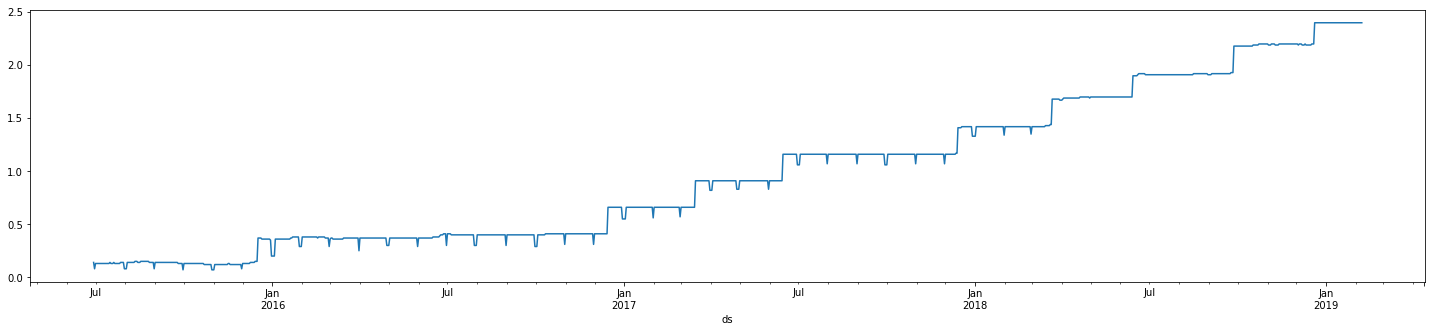

In [67]:
ffr.y.plot(figsize=(25,5))

In [71]:
# get rid of the weekends....that's when the big dips occur
# drop any day of week==6 or 5
ffr = ffr.loc[ffr.index.dayofweek<5]

In [72]:
ffr.shape

(944, 2)

In [73]:
cpffr = cp.cp2(ffr, ycol='y', dcol='ds', delta=10)

/Users/lukefitzpatrick/Desktop/changepoint/src/changepoint.py:32: FutureWarning: 'ds' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  data = data.sort_values(by=dcol)


In [74]:
cpts = cpffr.run()

testing 2015-06-29T00:00:00.000000000 to 2019-02-07T00:00:00.000000000
changepoint detected at 2018-08-24T00:00:00.000000000

testing 2015-06-29T00:00:00.000000000 to 2018-08-24T00:00:00.000000000
changepoint detected at 2018-05-11T00:00:00.000000000

testing 2018-08-27T00:00:00.000000000 to 2019-02-07T00:00:00.000000000
changepoint detected at 2018-11-22T00:00:00.000000000

testing 2015-06-29T00:00:00.000000000 to 2018-05-11T00:00:00.000000000
changepoint detected at 2018-02-16T00:00:00.000000000

testing 2018-05-14T00:00:00.000000000 to 2018-08-24T00:00:00.000000000
no changepoint detected 

testing 2018-08-27T00:00:00.000000000 to 2018-11-22T00:00:00.000000000
no changepoint detected 

testing 2018-11-23T00:00:00.000000000 to 2019-02-07T00:00:00.000000000
no changepoint detected 

testing 2015-06-29T00:00:00.000000000 to 2018-02-16T00:00:00.000000000
changepoint detected at 2017-07-24T00:00:00.000000000

testing 2018-02-19T00:00:00.000000000 to 2018-05-11T00:00:00.000000000
no chang

In [75]:
cpts.sort()

In [76]:
cpts

[numpy.datetime64('2016-05-25T00:00:00.000000000'),
 numpy.datetime64('2016-11-17T00:00:00.000000000'),
 numpy.datetime64('2017-02-13T00:00:00.000000000'),
 numpy.datetime64('2017-05-12T00:00:00.000000000'),
 numpy.datetime64('2017-07-24T00:00:00.000000000'),
 numpy.datetime64('2017-11-16T00:00:00.000000000'),
 numpy.datetime64('2018-02-16T00:00:00.000000000'),
 numpy.datetime64('2018-05-11T00:00:00.000000000'),
 numpy.datetime64('2018-08-24T00:00:00.000000000'),
 numpy.datetime64('2018-11-22T00:00:00.000000000')]

/Users/lukefitzpatrick/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


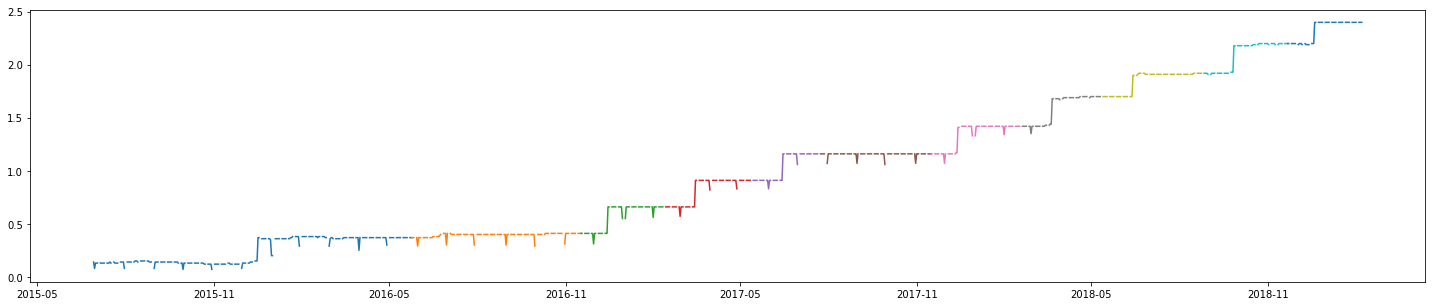

In [77]:
cpffr.make_plot(cpts)

In [78]:
# this doesn't work very well. there are clearly breaks occurring that aren't captured.

# AFTER THE FIX

In [9]:
os.chdir('/Users/lfitzpatrick/changepoint/')
from src import changepoint as cp
cp = importlib.reload(cp)

In [10]:
ffr = pd.read_csv('data/DFF.csv')
ffr = ffr.rename(columns={'DFF':'y', 'DATE':'ds'})
ffr['ds'] = pd.to_datetime(ffr['ds'])
ffr.index = pd.DatetimeIndex(ffr['ds'])

ffr = ffr.loc[ffr.index.dayofweek<5]

cpffr = cp.cp2(ffr, ycol='y', dcol='ds', delta=20)

cpts = cpffr.run()

/Users/lfitzpatrick/changepoint/src/changepoint.py:32: FutureWarning: 'ds' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  data = data.sort_values(by=dcol)


testing 2015-06-29T00:00:00.000000000 to 2019-02-07T00:00:00.000000000
no changepoint detected 



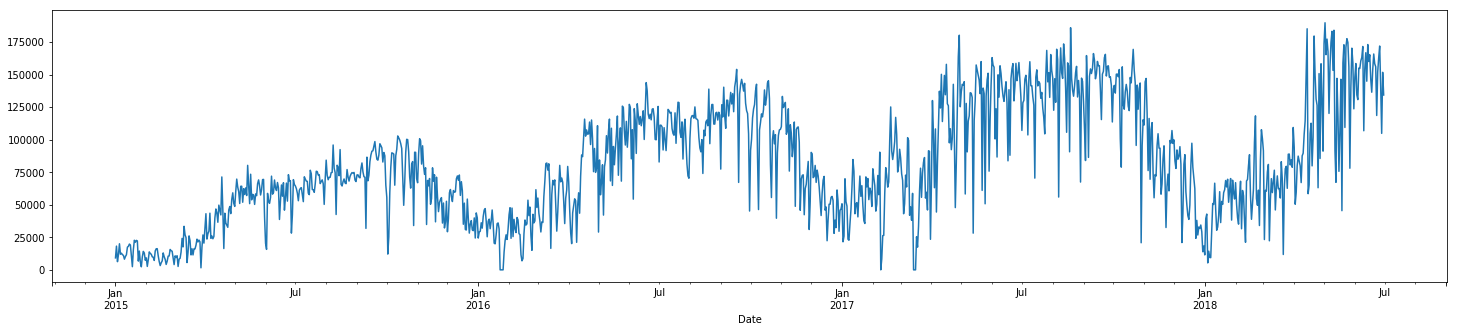

In [11]:
bike = pd.read_csv('data/bikemiles.csv')
    
bike.index = pd.DatetimeIndex(bike['Date'])

fig, ax = plt.subplots(figsize=(25,5))
bike['y'].plot()

In [13]:
cpbike = cp.cp2(bike, ycol='y', delta=10)


cpts = cpbike.run()

testing 2015-01-01T00:00:00.000000000 to 2018-06-30T00:00:00.000000000
no changepoint detected 

